## Training Mask RCNN models on BND dataset

This notebook trains a Mask RCNN model to identify fins in the BND dataset.  It is designed to run in Google Colab.  The GPU will be required for efficient training.


# Preparatation
In this section the required packages are loaded and installed.  The links to the appropriate drives where folders are to be saved are also updated.

**Step 1: Select whether you are running on Colab or AWS**


In [ ]:
DataVersion = ""
Engine = "Colab" # "AWS" or "Colab"

if Engine == "Colab":
  ResultsFolder = r"/content/gdrive/My Drive/Colab Notebooks/Results"
  ModelFolder = r"/content/gdrive/My Drive/Colab Notebooks/Models/OD/BND"
  ROOT_DIR = r"/content/gdrive/My Drive/Colab Notebooks/Mask_RCNN"

else:
  ResultsFolder = r"~/Results"
  ModelFolder = r"~/Models"
  ROOT_DIR = r"~/Mask_RCNN"

**Step 2: Mount google drive and test connection for Colab**


In [ ]:
if Engine == "Colab":
  from google.colab import drive
  
  drive.mount("/content/gdrive")

  !python3.6 gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/Hello.py

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Hello world!!


**Step 3: Install correct version of the required packages**

In [ ]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow

if Engine == "Colab":
  %cd /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN
  !pip install -r requirements3.txt

elif Engine == "AWS":
  !pip install -r requirements3.txt

#%tensorflow_version 2.x #use this to select the version of Tensorflow to uninstall
%tensorflow_version 1.x #use this to select the version of Tensorflow to r


/content/gdrive/My Drive/Colab Notebooks/Mask_RCNN
  Using cached tensorflow_gpu-1.15.3-cp37-cp37m-manylinux2010_x86_64.whl (411.0 MB)
  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x #use this to select the version of Tensorflow to r`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


**Step 4: Run install file if needed**

In [ ]:
if Engine == "Colab":
  %cd /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN
elif Engine == "AWS":
  %cd /Mask_RCNN

!python setup.py install

/content/gdrive/My Drive/Colab Notebooks/Mask_RCNN
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model2.py -> build/bdist.linux-x86_64/egg/mrcnn
copyi

\****Now restart the kernel before proceeding to the next step****
************************************************************************************************************************************************************************************************************************************************

# Training the Mask RCNN models

In [ ]:
#Delete old models except for final model

def DelPremModels(folder):
  for subfolder in os.listdir(folder):
    for file in os.listdir(os.path.join(folder, subfolder, file)):
      if file[-7] == "0030.h5":
        shutil.copy(os.path.join(folder, subfolder, file), os.path.join(ModelFolder, folder[-2] + file))
    shutil.rmtree(os.path.join(folder, subfolder))


In [ ]:
pip install h5py==2.10.0 keras==2.2.4 tensorflow-gpu==1.15.3

**Step 4: Train models without using loops**

In [ ]:
if Engine == "Colab":

  %cd /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND

  try:
    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py train --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_10 --weights=coco --logs=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/10
    DelPremModels("/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/10")
    print("Done with "+ str(1)+ " out of 10 iterations")

    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py train --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_20 --weights=coco --logs=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/20
    DelPremModels("/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/20")
    print("Done with "+ str(2)+ " out of 10 iterations")

    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_30 --weights=coco --logs=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/30
    DelPremModels("/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/30")
    print("Done with "+ str(3)+ " out of 10 iterations")

    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_40 --weights=coco --logs=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/40
    DelPremModels("/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/40")
    print("Done with "+ str(4)+ " out of 10 iterations")

    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_50 --weights=coco --logs=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/50
    DelPremModels("/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/50")
    print("Done with "+ str(5)+ " out of 10 iterations")

  except:
    print("Failed to run.")

#elif Engine == "AWS":
  
 #   %~./Mask_RCNN/samples/BND

    #try:
    #  !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_10 --weights=coco --logs=~./Mask_RCNN/logs/BND/10
    #  DelPremModels(~./Mask_RCNN/logs/BND/10)
    #  print("Done with "+ str(1)+ " out of 10 iterations")

    #  !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_20 --weights=coco --logs=~./Mask_RCNN/logs/BND/20
    #  DelPremModels(~./Mask_RCNN/logs/BND/20)
    #  print("Done with "+ str(2)+ " out of 10 iterations")

   #   !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_30 --weights=coco --logs=~./Mask_RCNN/logs/BND/30
   #   DelPremModels(~./Mask_RCNN/logs/BND/30)
   #   print("Done with "+ str(3)+ " out of 10 iterations")

    #  !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_40 --weights=coco --logs=~./Mask_RCNN/logs/BND/40
    #  DelPremModels(~./Mask_RCNN/logs/BND/40)
    #  print("Done with "+ str(4)+ " out of 10 iterations")

     # !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_50 --weights=coco --logs=~./Mask_RCNN/logs/BND/50
     # DelPremModels(~./Mask_RCNN/logs/BND/50)
     # print("Done with "+ str(5)+ " out of 10 iterations")

    #except:
     # print("Failed to run.")


/content/gdrive/My Drive/Colab Notebooks/Mask_RCNN/samples/BND
  File "/content/gdrive/My Drive/Colab Notebooks/Mask_RCNN/samples/BND/BND.py", line 118
    for file in os.listdir(os.path.join(dataset_dir, Masks)):
                                                            ^
TabError: inconsistent use of tabs and spaces in indentation
Failed to run.


In [ ]:
if Engine = "Colab":
  
  %cd /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND

  try:
    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py train --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_60 --weights=coco --logs = /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/60
    DelPremModels(/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/60)
    print("Done with "+ str(6)+ " out of 10 iterations")

    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py train --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_70 --weights=coco --logs = /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/70
    DelPremModels(/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/70)
    print("Done with "+ str(7)+ " out of 10 iterations")

    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py train --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_80 --weights=coco = --logs = /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/80
    DelPremModels(/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/80)
    print("Done with "+ str(8)+ " out of 10 iterations")

    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py train --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_90 --weights=coco = --logs = /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/90
    DelPremModels(/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/90)
    print("Done with "+ str(9)+ " out of 10 iterations")

    !python /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND/BND.py train --dataset=/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/datasets/BND/Train_100 --weights=coco --logs = /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/100
    DelPremModels(/content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/logs/BND/100)
    print("Done with "+ str(10)+ " out of 10 iterations")

  except:
    print("Failed to run.")


  elif Engine == "AWS":
  
    %~./Mask_RCNN/samples/BND

    try:
      !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_60 --weights=coco --logs=~./Mask_RCNN/logs/BND/60
      DelPremModels(~./Mask_RCNN/logs/BND/60)
      print("Done with "+ str(6)+ " out of 10 iterations")

      !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_70 --weights=coco --logs=~./Mask_RCNN/logs/BND/70
      DelPremModels(~./Mask_RCNN/logs/BND/70)
      print("Done with "+ str(7)+ " out of 10 iterations")

      !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_80 --weights=coco --logs=~./Mask_RCNN/logs/BND/80
      DelPremModels(~./Mask_RCNN/logs/BND/80)
      print("Done with "+ str(8)+ " out of 10 iterations")

      !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_90 --weights=coco --logs=~./Mask_RCNN/logs/BND/90
      DelPremModels(~./Mask_RCNN/logs/BND/90)
      print("Done with "+ str(9)+ " out of 10 iterations")

      !python ~./Mask_RCNN/samples/BND/BND.py --dataset=~./Mask_RCNN/datasets/BND/Train_100 --weights=coco --logs=~./Mask_RCNN/logs/BND/100
      DelPremModels(~./Mask_RCNN/logs/BND/100)
      print("Done with "+ str(10)+ " out of 10 iterations")

  except:
    print("Failed to run.")

/content/gdrive/My Drive/Colab Notebooks/Mask_RCNN/samples/HBW
Using TensorFlow backend.
Weights:  coco
Dataset:  /content/gdrive/My Drive/Colab Notebooks/Mask_RCNN/datasets/HBW/Train_20
Logs:  /content/gdrive/My Drive/Colab Notebooks/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM        

# Evaluate the Mask RCNN models

In [ ]:
!pip install tensorflow-gpu==1.15.3

In [ ]:
import os
import sys
import pandas as pd
import tensorflow as tf
import numpy as np
from tqdm import tqdm


In [ ]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
import tensorflow as tf

%matplotlib inline 

Using TensorFlow backend.


In [ ]:
# Import BND config
#sys.path.append(os.path.join(ROOT_DIR, "samples/BND/"))  # To find local version

if Engine == "Colab":
  %cd /content/gdrive/My\ Drive/Colab\ Notebooks/Mask_RCNN/samples/BND

elif Engine == "AWS":
  %cd ~./Mask_RCNN/samples/BND

import BND3
config = BND3.BNDConfig()
Dataset_DIR = os.path.join(ROOT_DIR, "datasets/BND/Train_200")

/content/gdrive/MyDrive/Colab Notebooks/Mask_RCNN/samples/BND


In [ ]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(BND3.BNDConfig):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [ ]:
from matplotlib import pyplot as plt

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax
    

In [ ]:
# Build validation dataset
if config.NAME == "BND":
    dataset = BND3.BNDDataset()
    dataset.load_BND(Dataset_DIR, "val") #dataset.load_BND(Dataset_DIR, "train")
    
# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 100
Classes: ['BG', 'dolphin']


In [ ]:
pip install 'h5py==2.10.0' --force-reinstall

  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.4.0 which is incompatible.
lucid 0.3.10 requir

In [ ]:
def merged_mask(masks):
    """
    merge mask into one and return merged mask
    """
    n= masks.shape[2]
    
    if n!=0:        
        merged_mask = np.zeros((masks.shape[0], masks.shape[1]))
        for i in range(n):
            merged_mask+=masks[...,i]
        merged_mask=np.asarray(merged_mask,dtype=np.uint8)   
        return merged_mask
    return masks[:,:,0]
    

def compute_iou(predict_mask, gt_mask):
    """
    Computes Intersection over Union score for two binary masks.
    :param predict_mask: numpy array
    :param gt_mask: numpy array
    :type1 and type2 results are same
    :return iou score:
    """
    if predict_mask.shape[2]==0:
        return 0
    mask1 = merged_mask(predict_mask)
    mask2 = merged_mask(gt_mask)
    
    #type 1
    intersection = np.sum((mask1 + mask2) > 1)
    union = np.sum((mask1 + mask2) > 0)
    iou_score = intersection / float(union)
    #print("Iou 1 : ",iou_score)
    
    #type2
    #intersection = np.logical_and(mask1, mask2)#*
    #union = np.logical_or(mask1, mask2)# +
    #iou_score = np.sum(intersection) / np.sum(union)
    #print("Iou 2 : ",iou_score)
    return iou_score

In [ ]:
ModelFolder = os.path.join(ModelFolder)

In [ ]:
### Load model and calculate overlaps

Results = pd.DataFrame(columns = ["Model", "Image_ID", "Image_Name", "AP", "Precision", "Recall", "Confidence", "Overlap", "Overlap2", "Objects"])
# Path to trained weights
#SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")

thismodel = os.path.join(ModelFolder, "mask_rcnn_bnd_0030.h5")

BND_MODEL_PATH = os.path.join(ModelFolder, thismodel)

####Load Model
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=ModelFolder,
                              config=config)

# Set weights file path
if config.NAME == "BND":
    weights_path = BND_MODEL_PATH

# Or, uncomment to load the last model you trained
# weights_path = model.find_last()

### Run detection
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

for thisimage in tqdm(list(dataset.image_ids)):
  #image_id = random.choice(dataset.image_ids)
  image_id = thisimage

  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)

  info = dataset.image_info[image_id]
  print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                        dataset.image_reference(image_id)))
  # Run object detection
  results = model.detect([image], verbose=1)

  # Display results
  #ax = get_ax(1)
  r = results[0]
  #visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            #dataset.class_names, r['scores'], ax=ax,
                            #title="Predictions")
  #log("gt_class_id", gt_class_id)
  #log("gt_bbox", gt_bbox)
  #log("gt_mask", gt_mask)

  # Draw precision-recall curve
  AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                      r['rois'], r['class_ids'], r['scores'], r['masks'])

  overlap2 = compute_iou(r['masks'],  gt_mask)

  Results = Results.append({"Model":thismodel, "Image_ID": image_id, "Image_Name":info["id"], "AP": AP, "Precision": precisions, "Recall":recalls, "Confidence": r['scores'],"Overlap": overlaps, "Overlap2": overlap2, "Objects": len(overlaps)}, ignore_index = True)
  #visualize.plot_precision_recall(AP, precisions, recalls)overlap
  
Results.to_csv(os.path.join(ROOT_DIR, "BND_Test_Overlap_MinConfidence50.csv"))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights  /content/gdrive/My Drive/Colab Notebooks/Models/OD/BND/mask_rcnn_bnd_0030.h5


  0%|          | 0/100 [00:00<?, ?it/s]

image ID: dolphin.SB16-1623-228.jpg (0) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32



  1%|          | 1/100 [00:09<15:26,  9.36s/it]

image ID: dolphin.SB09-1274-344.jpg (1) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


  2%|▏         | 2/100 [00:10<07:44,  4.74s/it]

image ID: dolphin.SB18-1682-133.jpg (2) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


  3%|▎         | 3/100 [00:12<05:00,  3.10s/it]

image ID: dolphin.SB18-1686-312.jpg (3) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


  4%|▍         | 4/100 [00:13<03:47,  2.37s/it]

image ID: dolphin.SB13-1523-173.jpg (4) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


  5%|▌         | 5/100 [00:14<03:05,  1.96s/it]

image ID: dolphin.SB12-1483-251.jpg (5) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


  6%|▌         | 6/100 [00:15<02:40,  1.71s/it]

image ID: dolphin.SB17-1644-001.jpg (6) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


  7%|▋         | 7/100 [00:17<02:34,  1.66s/it]

image ID: dolphin.SB13-1510-093.jpg (7) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


  8%|▊         | 8/100 [00:19<02:34,  1.68s/it]

image ID: dolphin.SB13-1514-263.jpg (8) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


  9%|▉         | 9/100 [00:20<02:22,  1.57s/it]

image ID: dolphin.SB13-1523-093.jpg (9) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 10%|█         | 10/100 [00:21<02:15,  1.51s/it]

image ID: dolphin.SB18-1682-639.jpg (10) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 11%|█         | 11/100 [00:22<02:05,  1.41s/it]

image ID: dolphin.SB08-1071-089.jpg (11) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 12%|█▏        | 12/100 [00:24<01:57,  1.34s/it]

image ID: dolphin.SB17-1647-026.jpg (12) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 13%|█▎        | 13/100 [00:25<01:53,  1.30s/it]

image ID: dolphin.SB12-1463-460.jpg (13) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 14%|█▍        | 14/100 [00:26<01:52,  1.30s/it]

image ID: dolphin.SB19-1758-380.jpg (14) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 15%|█▌        | 15/100 [00:28<02:02,  1.44s/it]

image ID: dolphin.SB09-1260-071.jpg (15) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 16%|█▌        | 16/100 [00:29<01:55,  1.38s/it]

image ID: dolphin.SB11-1435-275.jpg (16) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 17%|█▋        | 17/100 [00:30<01:50,  1.33s/it]

image ID: dolphin.SB19-1732-305.jpg (17) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 18%|█▊        | 18/100 [00:32<01:46,  1.30s/it]

image ID: dolphin.SB09-1274-754.jpg (18) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 19%|█▉        | 19/100 [00:33<01:45,  1.30s/it]

image ID: dolphin.SB08-1073-008.jpg (19) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 20%|██        | 20/100 [00:34<01:47,  1.34s/it]

image ID: dolphin.SB13-1513-033.jpg (20) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 21%|██        | 21/100 [00:36<02:02,  1.55s/it]

image ID: dolphin.SB09-1264-576.jpg (21) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  245.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  121.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 22%|██▏       | 22/100 [00:38<01:54,  1.46s/it]

image ID: dolphin.SB10-1371-052.jpg (22) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  240.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  135.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 23%|██▎       | 23/100 [00:39<01:46,  1.38s/it]

image ID: dolphin.SB08-1070-127.jpg (23) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 24%|██▍       | 24/100 [00:40<01:45,  1.39s/it]

image ID: dolphin.SB13-1513-258.jpg (24) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  249.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 25%|██▌       | 25/100 [00:41<01:41,  1.36s/it]

image ID: dolphin.SB09-1258-059.jpg (25) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 26%|██▌       | 26/100 [00:43<01:39,  1.34s/it]

image ID: dolphin.SB17-1636-346.jpg (26) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 27%|██▋       | 27/100 [00:44<01:39,  1.36s/it]

image ID: dolphin.SB17-1636-368.jpg (27) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 28%|██▊       | 28/100 [00:46<01:50,  1.53s/it]

image ID: dolphin.SB09-1274-288.jpg (28) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 29%|██▉       | 29/100 [00:47<01:42,  1.45s/it]

image ID: dolphin.SB12-1453-420.jpg (29) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 30%|███       | 30/100 [00:48<01:35,  1.36s/it]

image ID: dolphin.SB18-1714-173.jpg (30) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 31%|███       | 31/100 [00:50<01:32,  1.33s/it]

image ID: dolphin.SB15-1593-486.jpg (31) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  245.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 32%|███▏      | 32/100 [00:51<01:27,  1.28s/it]

image ID: dolphin.SB19-1767-052.jpg (32) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 33%|███▎      | 33/100 [00:53<01:34,  1.41s/it]

image ID: dolphin.SB08-1062-259.jpg (33) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 34%|███▍      | 34/100 [00:54<01:28,  1.34s/it]

image ID: dolphin.SB18-1696-151.jpg (34) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 35%|███▌      | 35/100 [00:55<01:28,  1.37s/it]

image ID: dolphin.SB10-1362-236.jpg (35) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  225.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  121.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 36%|███▌      | 36/100 [00:56<01:22,  1.30s/it]

image ID: dolphin.SB02-02-36.jpg (36) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 37%|███▋      | 37/100 [00:57<01:18,  1.24s/it]

image ID: dolphin.SB18-1696-145.jpg (37) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  239.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  135.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 38%|███▊      | 38/100 [00:59<01:16,  1.23s/it]

image ID: dolphin.SB09-1264-333.jpg (38) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 39%|███▉      | 39/100 [01:00<01:15,  1.24s/it]

image ID: dolphin.SB17-1663-470.jpg (39) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 40%|████      | 40/100 [01:01<01:15,  1.26s/it]

image ID: dolphin.SB11-1429-245.jpg (40) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 41%|████      | 41/100 [01:02<01:12,  1.23s/it]

image ID: dolphin.SB17-1636-065.jpg (41) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 42%|████▏     | 42/100 [01:04<01:11,  1.24s/it]

image ID: dolphin.SB16-1609-273.jpg (42) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 43%|████▎     | 43/100 [01:05<01:09,  1.22s/it]

image ID: dolphin.SB08-1077-003.jpg (43) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 44%|████▍     | 44/100 [01:06<01:08,  1.23s/it]

image ID: dolphin.SB08-1075-110.jpg (44) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 45%|████▌     | 45/100 [01:07<01:06,  1.22s/it]

image ID: dolphin.SB18-1711-266.jpg (45) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 46%|████▌     | 46/100 [01:10<01:22,  1.53s/it]

image ID: dolphin.SB09-1264-390.jpg (46) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 47%|████▋     | 47/100 [01:11<01:27,  1.66s/it]

image ID: dolphin.SB13-1494-174.jpg (47) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 48%|████▊     | 48/100 [01:14<01:32,  1.78s/it]

image ID: dolphin.SB16-1626-068.jpg (48) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 49%|████▉     | 49/100 [01:15<01:31,  1.79s/it]

image ID: dolphin.SB17-1663-113.jpg (49) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 50%|█████     | 50/100 [01:18<01:35,  1.90s/it]

image ID: dolphin.SB08-1077-008.jpg (50) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  251.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 51%|█████     | 51/100 [01:19<01:26,  1.77s/it]

image ID: dolphin.SB17-1663-502.jpg (51) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 52%|█████▏    | 52/100 [01:20<01:17,  1.62s/it]

image ID: dolphin.SB17-1663-105.jpg (52) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 53%|█████▎    | 53/100 [01:21<01:09,  1.49s/it]

image ID: dolphin.SB09-1245-037.jpg (53) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 54%|█████▍    | 54/100 [01:23<01:05,  1.42s/it]

image ID: dolphin.SB16-1626-007.jpg (54) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  235.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  122.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 55%|█████▌    | 55/100 [01:24<01:03,  1.41s/it]

image ID: dolphin.SB18-1701-435.jpg (55) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 56%|█████▌    | 56/100 [01:25<00:58,  1.34s/it]

image ID: dolphin.SB18-1696-579.jpg (56) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  248.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 57%|█████▋    | 57/100 [01:27<00:56,  1.32s/it]

image ID: dolphin.SB18-1682-552.jpg (57) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 58%|█████▊    | 58/100 [01:28<00:54,  1.29s/it]

image ID: dolphin.SB09-1264-144.jpg (58) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  227.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  123.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 59%|█████▉    | 59/100 [01:29<00:52,  1.27s/it]

image ID: dolphin.SB19-1767-468.jpg (59) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 60%|██████    | 60/100 [01:31<00:57,  1.44s/it]

image ID: dolphin.SB13-1503-071.jpg (60) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 61%|██████    | 61/100 [01:32<00:58,  1.49s/it]

image ID: dolphin.SB18-1696-058.jpg (61) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  220.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  116.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 62%|██████▏   | 62/100 [01:34<00:52,  1.39s/it]

image ID: dolphin.SB08-1077-017.jpg (62) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 63%|██████▎   | 63/100 [01:35<00:50,  1.35s/it]

image ID: dolphin.SB13-1514-202.jpg (63) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 64%|██████▍   | 64/100 [01:36<00:50,  1.39s/it]

image ID: dolphin.SB08-1075-050.jpg (64) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 65%|██████▌   | 65/100 [01:38<00:49,  1.42s/it]

image ID: dolphin.SB11-1442-356.jpg (65) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  228.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  116.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 66%|██████▌   | 66/100 [01:39<00:45,  1.34s/it]

image ID: dolphin.SB17-1641-433.jpg (66) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 67%|██████▋   | 67/100 [01:40<00:42,  1.29s/it]

image ID: dolphin.SB16-1615-044.jpg (67) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 68%|██████▊   | 68/100 [01:41<00:40,  1.26s/it]

image ID: dolphin.SB16-1619-721.jpg (68) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 69%|██████▉   | 69/100 [01:43<00:38,  1.23s/it]

image ID: dolphin.SB10-1363-436.jpg (69) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 70%|███████   | 70/100 [01:44<00:37,  1.25s/it]

image ID: dolphin.SB02-14-29.jpg (70) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 71%|███████   | 71/100 [01:45<00:36,  1.27s/it]

image ID: dolphin.SB08-1073-112.jpg (71) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 72%|███████▏  | 72/100 [01:46<00:34,  1.23s/it]

image ID: dolphin.SB18-1684-452.jpg (72) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 73%|███████▎  | 73/100 [01:48<00:33,  1.23s/it]

image ID: dolphin.SB15-1593-614.jpg (73) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 74%|███████▍  | 74/100 [01:49<00:33,  1.28s/it]

image ID: dolphin.SB19-1767-567.jpg (74) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 75%|███████▌  | 75/100 [01:51<00:39,  1.58s/it]

image ID: dolphin.SB08-1031-035.jpg (75) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 76%|███████▌  | 76/100 [01:52<00:35,  1.46s/it]

image ID: dolphin.SB19-1750-121.jpg (76) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  244.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 77%|███████▋  | 77/100 [01:54<00:31,  1.39s/it]

image ID: dolphin.SB18-1682-287.jpg (77) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  244.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 78%|███████▊  | 78/100 [01:55<00:28,  1.32s/it]

image ID: dolphin.SB02-13-25.jpg (78) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 79%|███████▉  | 79/100 [01:56<00:27,  1.32s/it]

image ID: dolphin.SB16-1603-454.jpg (79) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  227.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  123.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 80%|████████  | 80/100 [01:57<00:25,  1.28s/it]

image ID: dolphin.SB13-1513-297.jpg (80) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 81%|████████  | 81/100 [01:59<00:25,  1.32s/it]

image ID: dolphin.SB12-1463-305.jpg (81) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 82%|████████▏ | 82/100 [02:00<00:23,  1.30s/it]

image ID: dolphin.SB15-1572-267.jpg (82) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 83%|████████▎ | 83/100 [02:01<00:21,  1.26s/it]

image ID: dolphin.SB08-1073-213.jpg (83) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 84%|████████▍ | 84/100 [02:03<00:21,  1.33s/it]

image ID: dolphin.SB08-1066-189.jpg (84) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 85%|████████▌ | 85/100 [02:04<00:19,  1.31s/it]

image ID: dolphin.SB08-1031-106.jpg (85) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 86%|████████▌ | 86/100 [02:05<00:17,  1.27s/it]

image ID: dolphin.SB02-11-19.jpg (86) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 87%|████████▋ | 87/100 [02:06<00:15,  1.22s/it]

image ID: dolphin.SB17-1638-173.jpg (87) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 88%|████████▊ | 88/100 [02:07<00:14,  1.22s/it]

image ID: dolphin.SB09-1245-309.jpg (88) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 89%|████████▉ | 89/100 [02:09<00:14,  1.33s/it]

image ID: dolphin.SB13-1510-118.jpg (89) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 90%|█████████ | 90/100 [02:10<00:13,  1.39s/it]

image ID: dolphin.SB08-1066-060.jpg (90) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 91%|█████████ | 91/100 [02:12<00:12,  1.34s/it]

image ID: dolphin.SB13-1513-263.jpg (91) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 92%|█████████▏| 92/100 [02:13<00:10,  1.30s/it]

image ID: dolphin.SB12-1466-540.jpg (92) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  229.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  125.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 93%|█████████▎| 93/100 [02:14<00:08,  1.27s/it]

image ID: dolphin.SB17-1636-206.jpg (93) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 94%|█████████▍| 94/100 [02:16<00:07,  1.33s/it]

image ID: dolphin.SB18-1702-820.jpg (94) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 95%|█████████▌| 95/100 [02:17<00:06,  1.34s/it]

image ID: dolphin.SB16-1619-707.jpg (95) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 96%|█████████▌| 96/100 [02:18<00:05,  1.30s/it]

image ID: dolphin.SB08-1068-237.jpg (96) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 97%|█████████▋| 97/100 [02:20<00:04,  1.36s/it]

image ID: dolphin.SB18-1719-437.jpg (97) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 98%|█████████▊| 98/100 [02:22<00:03,  1.65s/it]

image ID: dolphin.SB10-1356-527.jpg (98) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


 99%|█████████▉| 99/100 [02:23<00:01,  1.52s/it]

image ID: dolphin.SB08-1075-166.jpg (99) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


100%|██████████| 100/100 [02:24<00:00,  1.45s/it]


In [ ]:
Results.sort_values(by = ["Overlap2"], inplace= True, ascending= False)

In [ ]:
Results.head(15)

,Model,Image_ID,Image_Name,AP,Precision,Recall,Confidence,Overlap,Overlap2,Objects
33,/content/gdrive/My Drive/Colab Notebooks/Model...,33,SB08-1062-259.jpg,0.000000,"[0.0, 0.0]","[0.0, 1.0]",[],[],0.000000,0
64,/content/gdrive/My Drive/Colab Notebooks/Model...,64,SB08-1075-050.jpg,0.000000,"[0.0, 0.0]","[0.0, 1.0]",[],[],0.000000,0
34,/content/gdrive/My Drive/Colab Notebooks/Model...,34,SB18-1696-151.jpg,0.000000,"[0.0, 0.0, 0.0]","[0.0, 0.0, 1.0]",[0.9837262],[[0.0]],0.000000,1
74,/content/gdrive/My Drive/Colab Notebooks/Model...,74,SB19-1767-567.jpg,0.000000,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[0.9102476, 0.90001774]","[[0.0], [0.049954295]]",0.034522,2
92,/content/gdrive/My Drive/Colab Notebooks/Model...,92,SB12-1466-540.jpg,0.500000,"[0.5, 0.5, 0.5, 0.0]","[0.0, 0.0, 1.0, 1.0]","[0.97974294, 0.9465278]","[[0.0], [0.8724832]]",0.122033,2
52,/content/gdrive/My Drive/Colab Notebooks/Model...,52,SB17-1663-105.jpg,0.500000,"[0.5, 0.5, 0.5, 0.0]","[0.0, 0.0, 1.0, 1.0]","[0.9938334, 0.97050124]","[[0.0], [0.78272533]]",0.168204,2
43,/content/gdrive/My Drive/Colab Notebooks/Model...,43,SB08-1077-003.jpg,0.333333,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.0, 0.0, 0.0, 1.0, 1.0]","[0.9876966, 0.92516804, 0.9219801]","[[0.0], [0.0], [0.67200404]]",0.178740,3
85,/content/gdrive/My Drive/Colab Notebooks/Model...,85,SB08-1031-106.jpg,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.96080637, 0.95676714, 0.9516723]","[[0.4354443], [0.0], [0.0]]",0.183549,3
14,/content/gdrive/My Drive/Colab Notebooks/Model...,14,SB19-1758-380.jpg,0.500000,"[0.5, 0.5, 0.5, 0.0]","[0.0, 0.0, 1.0, 1.0]","[0.9819503, 0.97583663]","[[0.0], [0.8707671]]",0.207169,2
50,/content/gdrive/My Drive/Colab Notebooks/Model...,50,SB08-1077-008.jpg,0.500000,"[0.5, 0.5, 0.5, 0.0]","[0.0, 0.0, 1.0, 1.0]","[0.9795513, 0.93883216]","[[0.0], [0.66956145]]",0.224160,2


image ID: dolphin.SB08-1066-060.jpg (90) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


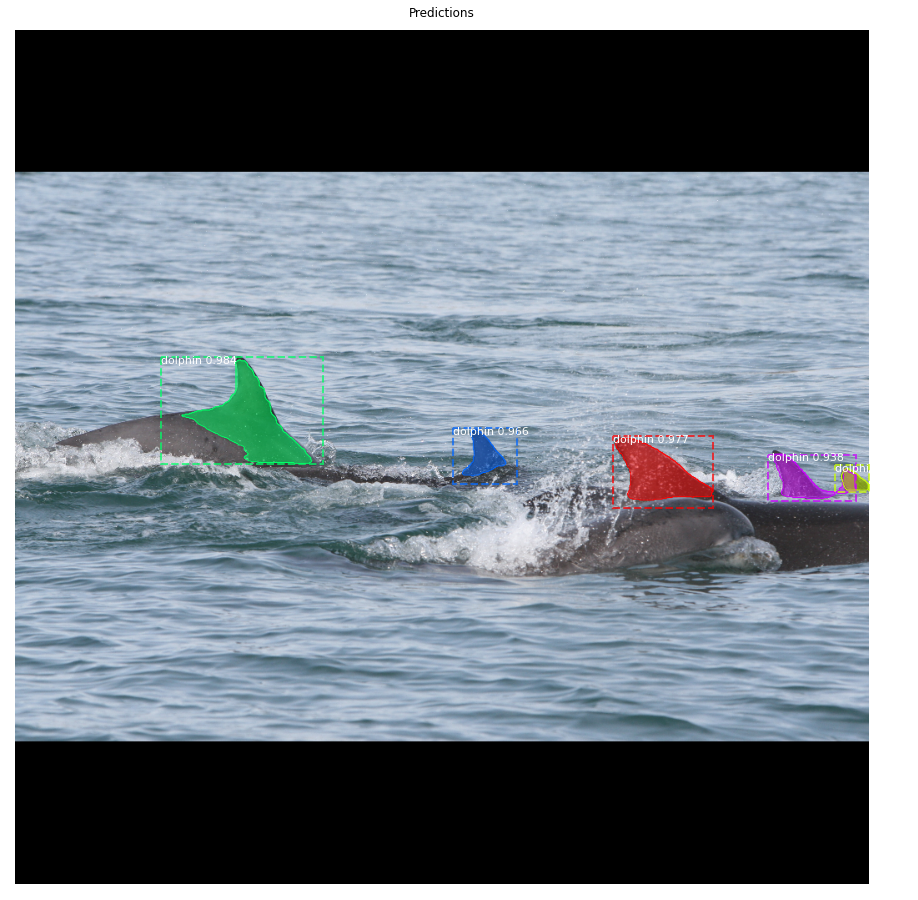

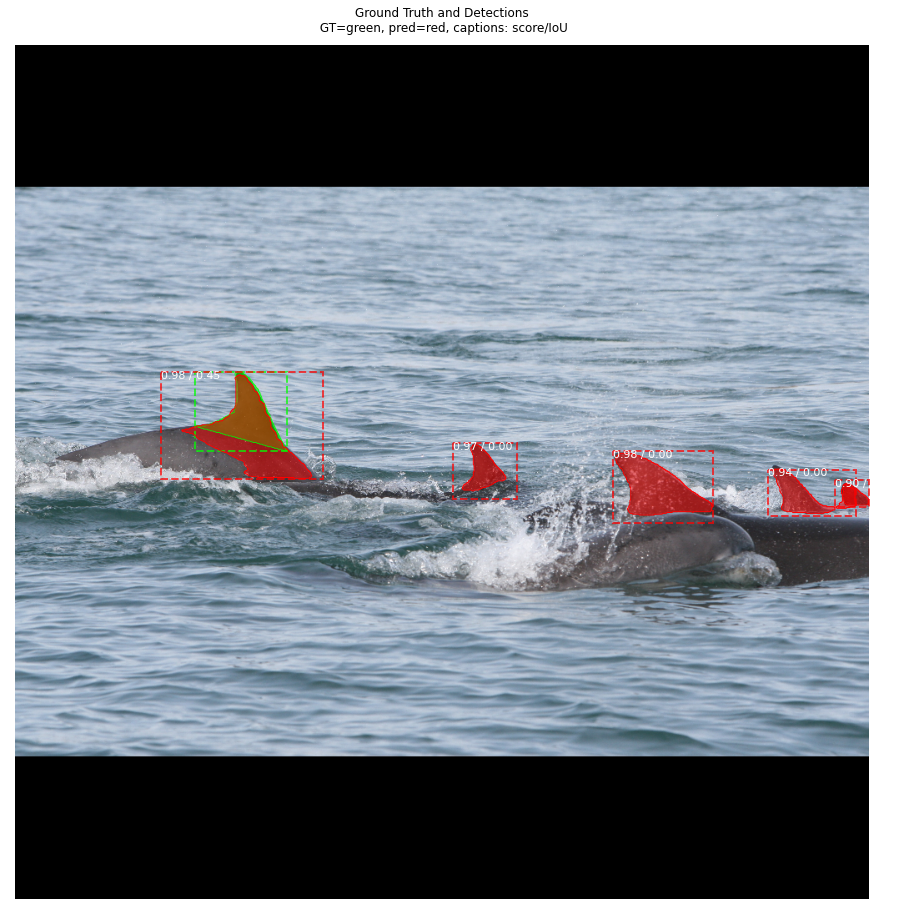

In [ ]:
image_id = 90

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
  modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)

info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                      dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                          dataset.class_names, r['scores'], ax=ax,
                          title="Predictions")

visualize.display_differences(image,
                        gt_bbox, gt_class_id, gt_mask,
                        r['rois'], r['class_ids'], r['scores'], r['masks'],
                        dataset.class_names)


In [ ]:
### Load model and calculate overlaps

Results = pd.DataFrame(columns = ["Model", "Image_ID", "Image_Name", "AP", "Precision", "Recall", "Overlap", "Overlap2", "Objects"])
# Path to trained weights
#SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")

for thismodel in os.listdir(os.path.join(ModelFolder)):

    BND_MODEL_PATH = os.path.join(ModelFolder, thismodel)

    ####Load Model
    # Create model in inference mode
    with tf.device(DEVICE):
        model = modellib.MaskRCNN(mode="inference", model_dir=ModelFolder,
                                  config=config)

    # Set weights file path
    if config.NAME == "BND":
        weights_path = BND_MODEL_PATH

    # Or, uncomment to load the last model you trained
    # weights_path = model.find_last()

    ### Run detection
    # Load weights
    print("Loading weights ", weights_path)
    model.load_weights(weights_path, by_name=True)

    for thisimage in list(dataset.image_ids):
      #image_id = random.choice(dataset.image_ids)
      image_id = thisimage
    
      image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    
      info = dataset.image_info[image_id]
      print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                           dataset.image_reference(image_id)))
      # Run object detection
      results = model.detect([image], verbose=1)

      # Display results
      #ax = get_ax(1)
      r = results[0]
      #visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                #dataset.class_names, r['scores'], ax=ax,
                                #title="Predictions")
      #log("gt_class_id", gt_class_id)
      #log("gt_bbox", gt_bbox)
      #log("gt_mask", gt_mask)

      # Draw precision-recall curve
      AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])

      overlap2 = compute_iou(r['masks'],  gt_mask)

      Results = Results.append({"Model":thismodel, "Image_ID": image_id, "Image_Name":info["id"], "AP": AP, "Precision": precisions, "Recall":recalls, "Overlap": overlaps, "Overlap2": overlap2, "Objects": len(overlaps)}, ignore_index = True)
      #visualize.plot_precision_recall(AP, precisions, recalls)overlap
  
Results.to_csv(os.path.join(ROOT_DIR, "Test_Overlap_MinConfidence90.csv"))



Loading weights  /content/gdrive/My Drive/Colab Notebooks/Models/OD/HBW/hbw20210506T2157-mask_rcnn_hbw_0030.h5
image ID: Whale fin.0ae6d74ca.jpg (0) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
image ID: Whale fin.0ae95cf70.jpg (1) None
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  221.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  117.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
ima

KeyboardInterrupt: ignored

In [ ]:
Results

,Model,Image_ID,Image_Name,AP,Precision,Recall,Overlap,Overlap2,Objects
0,hbw20210506T2157-mask_rcnn_hbw_0030.h5,0,0ae6d74ca.jpg,1.0,"[1.0, 1.0, 0.0]","[0.0, 1.0, 1.0]",[[0.93189156]],0.931892,1
1,hbw20210506T2157-mask_rcnn_hbw_0030.h5,1,0ae95cf70.jpg,1.0,"[1.0, 1.0, 0.0]","[0.0, 1.0, 1.0]",[[0.9120887]],0.912089,1
2,hbw20210506T2157-mask_rcnn_hbw_0030.h5,2,0aec375db.jpg,1.0,"[1.0, 1.0, 0.0]","[0.0, 1.0, 1.0]",[[0.92054266]],0.920543,1
3,hbw20210506T2157-mask_rcnn_hbw_0030.h5,3,0aef34cec.jpg,1.0,"[1.0, 1.0, 0.5, 0.0]","[0.0, 1.0, 1.0, 1.0]","[[0.91377], [0.022614434]]",0.913793,2
4,hbw20210506T2157-mask_rcnn_hbw_0030.h5,4,0af1d57ba.jpg,1.0,"[1.0, 1.0, 0.0]","[0.0, 1.0, 1.0]",[[0.915818]],0.915818,1
5,hbw20210506T2157-mask_rcnn_hbw_0030.h5,5,0f35bc5e8.jpg,1.0,"[1.0, 1.0, 0.0]","[0.0, 1.0, 1.0]",[[0.874212]],0.874212,1
6,hbw20210506T2157-mask_rcnn_hbw_0030.h5,6,0fb3bb3e7.jpg,1.0,"[1.0, 1.0, 0.0]","[0.0, 1.0, 1.0]",[[0.8478334]],0.847833,1
7,hbw20210506T2157-mask_rcnn_hbw_0030.h5,7,2b5c10c88.jpg,1.0,"[1.0, 1.0, 0.0]","[0.0, 1.0, 1.0]",[[0.7633355]],0.763336,1
8,hbw20210506T2157-mask_rcnn_hbw_0030.h5,8,2b11257ed.jpg,1.0,"[1.0, 1.0, 0.0]","[0.0, 1.0, 1.0]",[[0.9196198]],0.919620,1
9,hbw20210506T2157-mask_rcnn_hbw_0030.h5,9,2e9df43b1.jpg,1.0,"[1.0, 1.0, 0.5, 0.0]","[0.0, 1.0, 1.0, 1.0]","[[0.90775853], [0.0]]",0.901477,2


*****************************************************************************************************************